In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline

In [83]:
train_new = pd.read_csv('data/data_enginneered/train_new.csv')
test_new = pd.read_csv('data/data_enginneered/test_new.csv')

In [84]:
train_new.sample(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Lenght/Weight,Weight__sqrt,Height/Weight,Diameter_red,Weight_sum,Length_sqrt
35427,35427,0,1.5375,1.175,0.4125,29.270859,12.062712,6.350288,8.788345,10,0.052527,856.783172,0.014093,2.9375,27.201345,2.363906
55702,55702,0,1.6750,1.350,0.4625,42.736871,20.553387,7.966209,12.487955,10,0.039193,1826.440164,0.010822,3.3750,41.007552,2.805625


In [85]:
test_new.sample(2)

,Unnamed: 0,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lenght/Weight,Weight__sqrt,Height/Weight,Diameter_red,Weight_sum,Length_sqrt
26983,26983,101034,2,1.4875,1.1500,0.400,26.946200,13.933779,5.669900,6.463686,0.055203,726.097681,0.014844,2.87500,26.067365,2.212656
22296,22296,96347,0,0.9625,0.7375,0.275,8.320578,3.274367,1.743494,2.976698,0.115677,69.232022,0.033051,1.84375,7.994559,0.926406


In [86]:
train_new.shape, test_new.shape

((74051, 16), (49368, 16))

In [87]:
train_new.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Lenght/Weight',
       'Weight__sqrt', 'Height/Weight', 'Diameter_red', 'Weight_sum',
       'Length_sqrt'],
      dtype='object')

In [88]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  int64  
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
 10  Lenght/Weight   74051 non-null  float64
 11  Weight__sqrt    74051 non-null  float64
 12  Height/Weight   74051 non-null  float64
 13  Diameter_red    74051 non-null  float64
 14  Weight_sum      74051 non-null  float64
 15  Length_sqrt     74051 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 9.0 MB


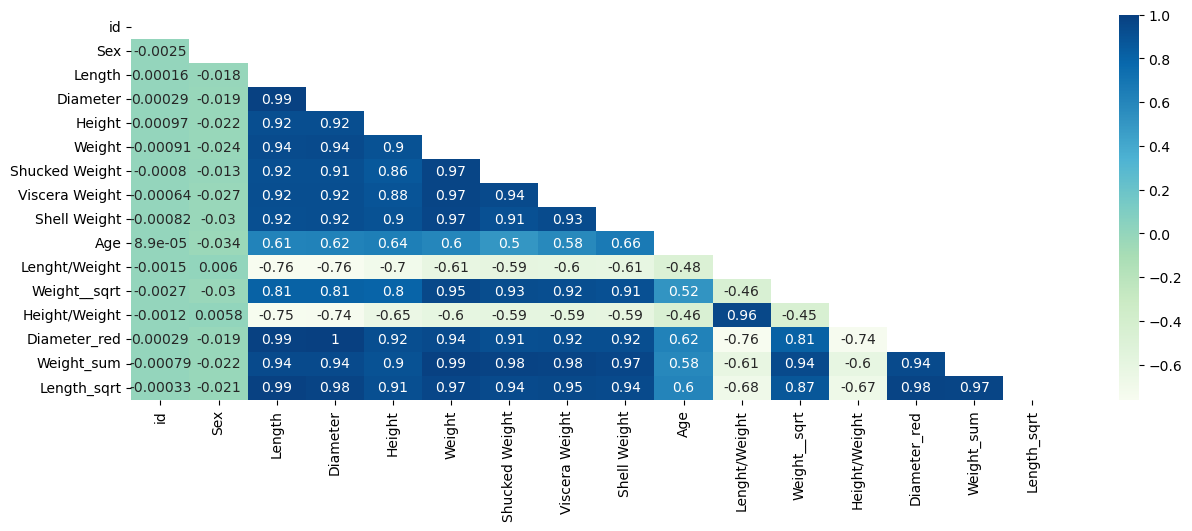

In [89]:
corr = train_new.corr()

plt.figure(figsize=(15, 5))
mask = np.triu(np.ones_like(train_new.corr()))
sns.heatmap(corr, annot=True, cbar=True, cmap='GnBu', mask=mask)
plt.show()

In [101]:
X = train_new.drop(['id', 'Age'], axis='columns')
y = train_new['Age']

In [96]:
X.shape, y.shape

((74051, 14), (74051,))

In [103]:
# Create a figure using Plotly Express
fig = px.histogram(y, nbins=30, opacity=0.7, color_discrete_sequence=['#1f77b4'])

# Add KDE (Kernel Density Estimation) curve
fig.update_traces(histnorm='density', histfunc='sum')
fig.update_layout(bargap=0.1)

# Show the plot
fig.show()


In [106]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [107]:
# Shape of train and test sets.

print(f'X Train data size: {X_train.shape}')
print(f'Y Train data size: {y_train.shape}')
print(f'X Test data size: {X_test.shape}')
print(f'Y Test data size: {y_test.shape}')

X Train data size: (51835, 14)
Y Train data size: (51835,)
X Test data size: (22216, 14)
Y Test data size: (22216,)


In [ ]:
# Discretize the target variable into bins or categories
num_bins = 3
y_bins = np.histogram(y, bins=num_bins)[1]
y_discrete = np.digitize(y, y_bins)

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = XGBRegressor()
# Iterate over the splits
for train_index, test_index in skf.split(X, y_discrete):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform model training and evaluation on each split
    xgb_model.fit(X_train, y_test)


    # Print the indices of the training and test data for each split
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print("")